This notebook presents the code used to generate the figures using the provided source data for the figures. As a first step, we will import the required packages and import the source code file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
import seaborn as sns
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
warnings.filterwarnings("ignore")
hh_profiles=pd.read_pickle('data/household_profiles.pkl')
hh_profiles['Total']=hh_profiles.sum(axis=1)


## Figure 2

(0.0, 1500.0)

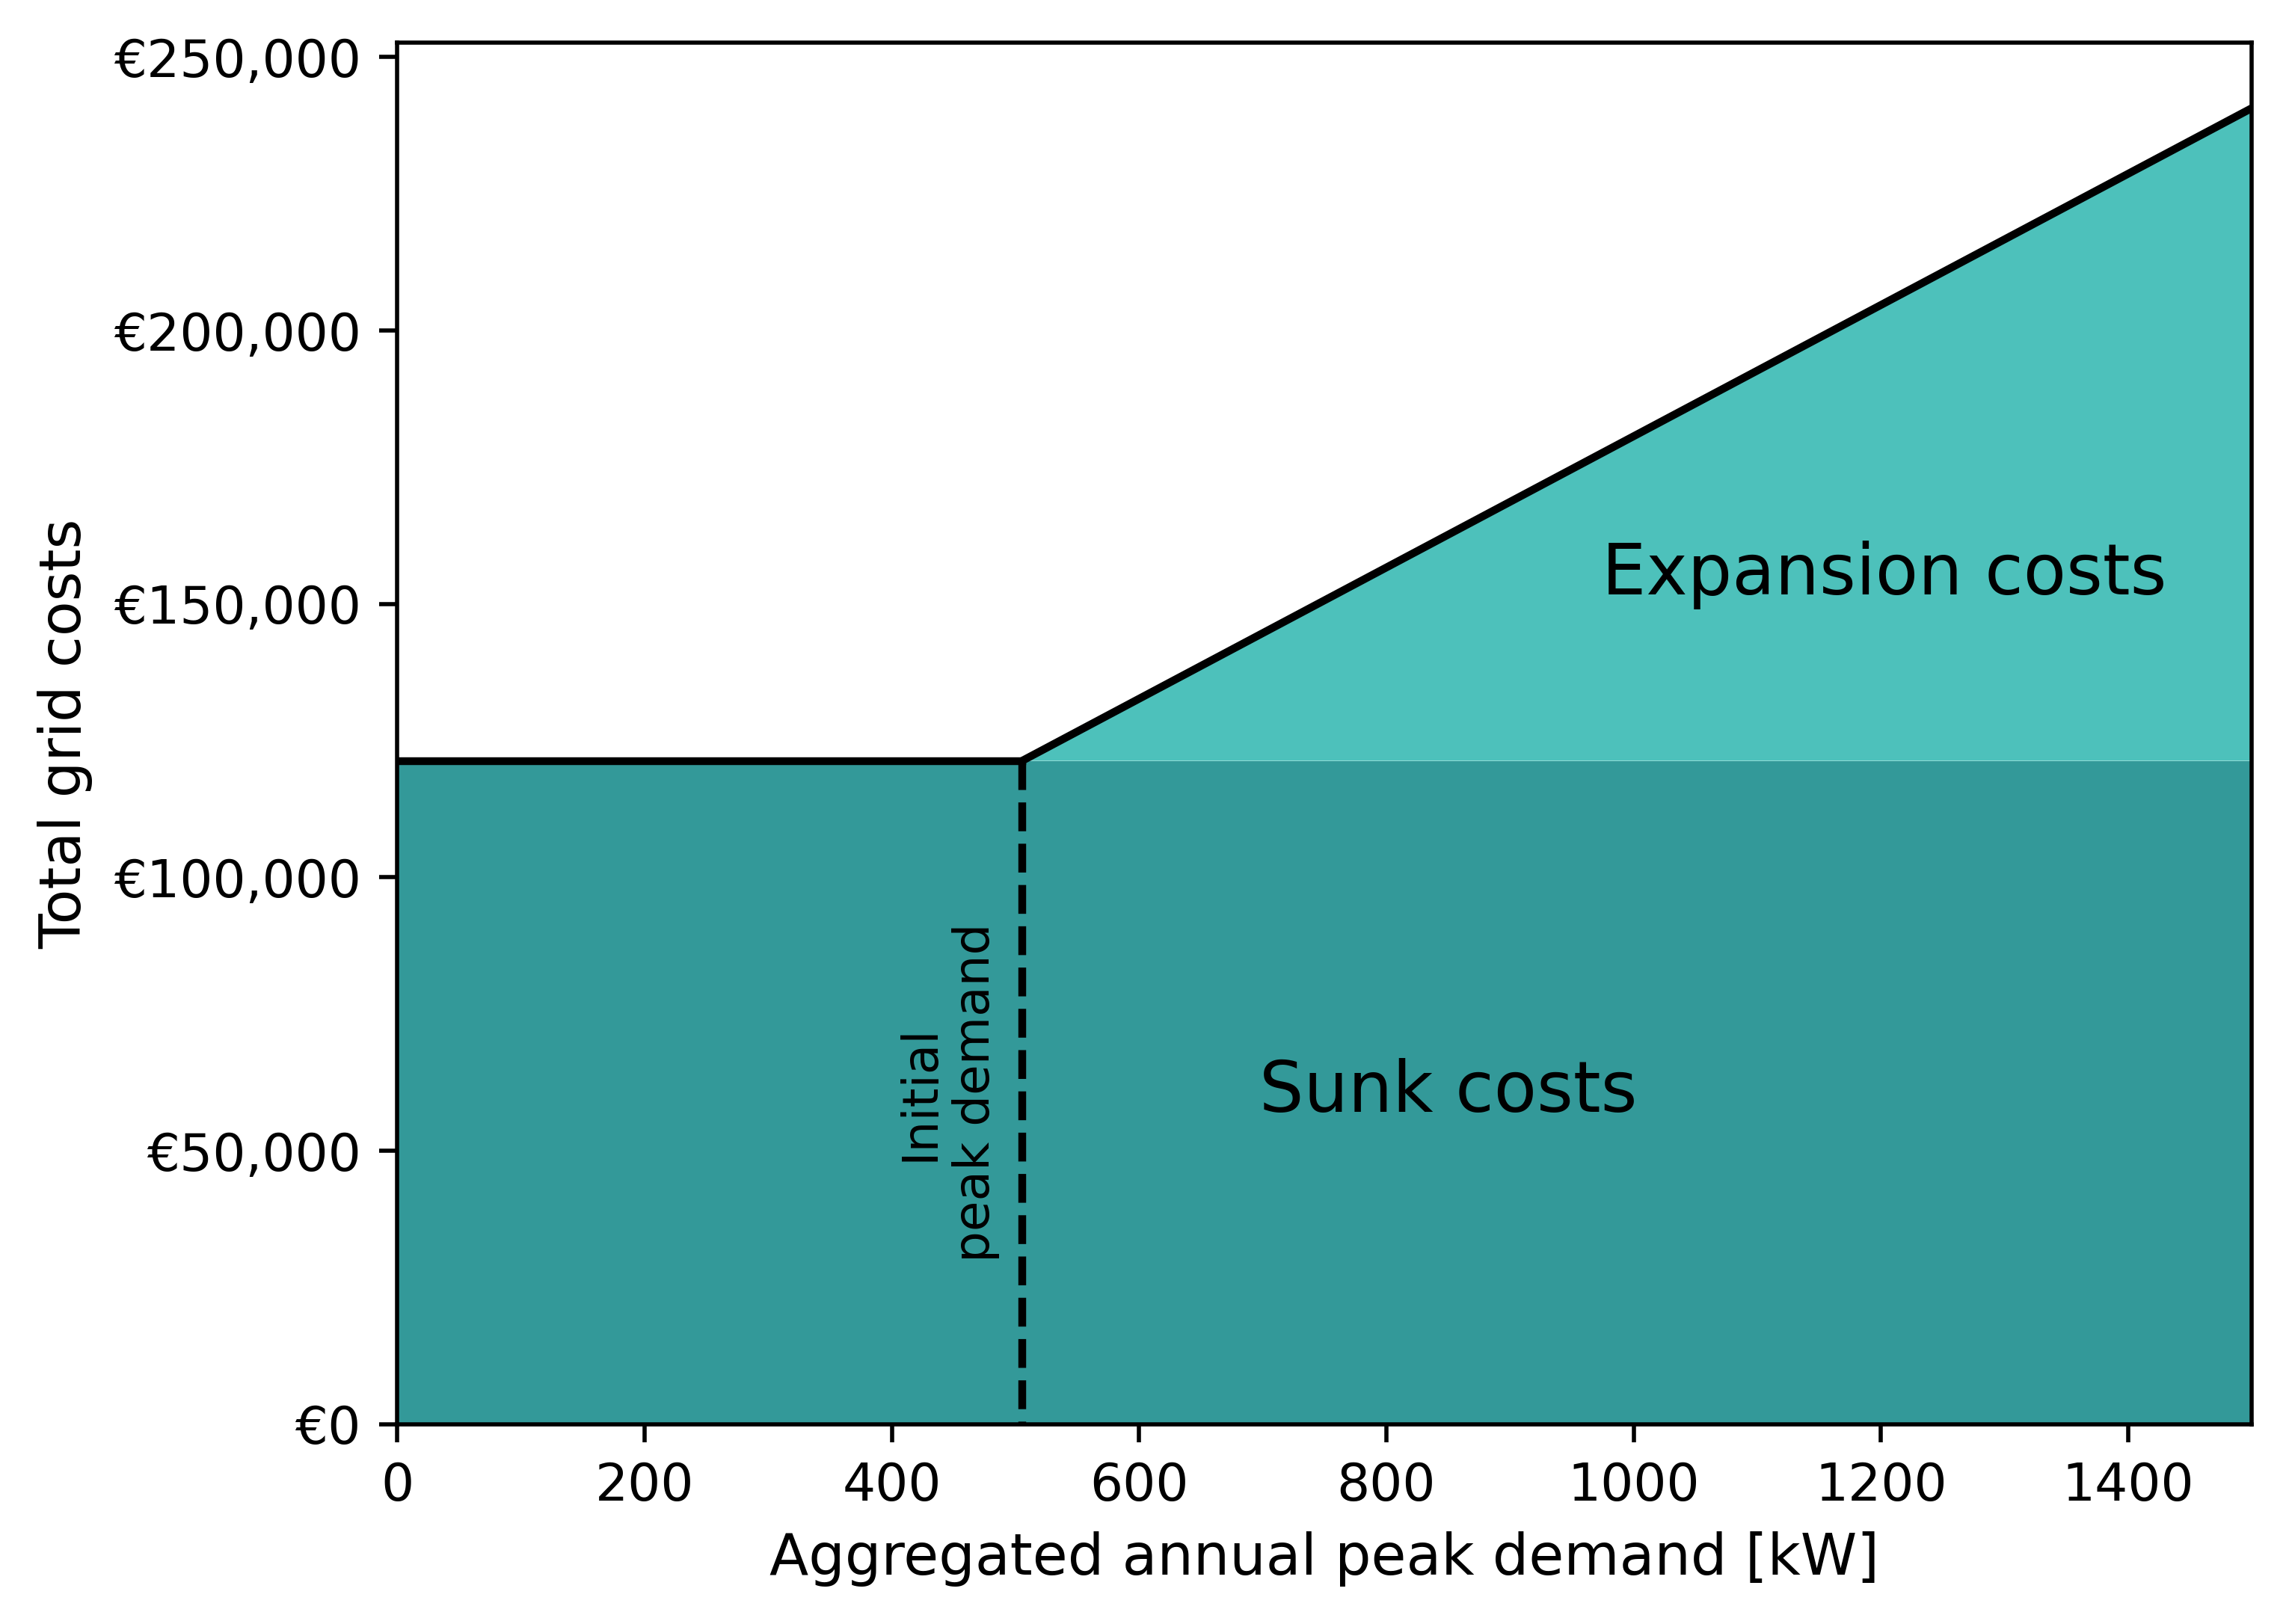

In [2]:
def euro_format(x, pos):
    return f'€{x:,.0f}'

expansion_costs=120 #€/kW
xmax=1500
sunk_costs=hh_profiles['Total'].max()*expansion_costs*2
color1='teal'
color2='lightseagreen'

"--------------------------------------------------------------------------------------------------------------"
fig=plt.figure(dpi=500)
plt.stackplot([0,hh_profiles['Total'].max()],[sunk_costs,sunk_costs],[0,0],colors=[color1,color2],alpha=0.8)
plt.stackplot([hh_profiles['Total'].max(),xmax],[sunk_costs,sunk_costs],[0,(xmax-hh_profiles['Total'].max())*expansion_costs],colors=[color1,color2],alpha=0.8)
plt.xlim(0,xmax)
plt.plot([0,hh_profiles['Total'].max()],[sunk_costs,sunk_costs],color='black')
plt.plot([hh_profiles['Total'].max(),xmax],[sunk_costs,sunk_costs+(xmax-hh_profiles['Total'].max())*expansion_costs],color='black')

plt.text(xmax/3*1.7,sunk_costs/2,'Sunk costs',ha='center',va='center',fontsize=13.5,color='black')
plt.text(hh_profiles['Total'].max()+(xmax-hh_profiles['Total'].max())/2+200,sunk_costs+(xmax-hh_profiles['Total'].max())*expansion_costs/3.5,'Expansion costs',ha='center',va='center',fontsize=13.5,color='black')

plt.ylim(0,(sunk_costs+(xmax-hh_profiles['Total'].max())*expansion_costs)*1.05)
plt.ylabel('Total grid costs',fontsize=11)
plt.xlabel('Aggregated annual peak demand [kW]',fontsize=11)
plt.plot([hh_profiles['Total'].max(),hh_profiles['Total'].max()],[sunk_costs,0],color='black',linestyle='--')
plt.text(x=hh_profiles['Total'].max()-60,y=sunk_costs/2,s='Initial\npeak demand',color='black',va='center',ha='center',rotation=90,fontsize=9.5)
ax = plt.gca()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(euro_format))

plt.xlim(0,xmax)

## Figure 3

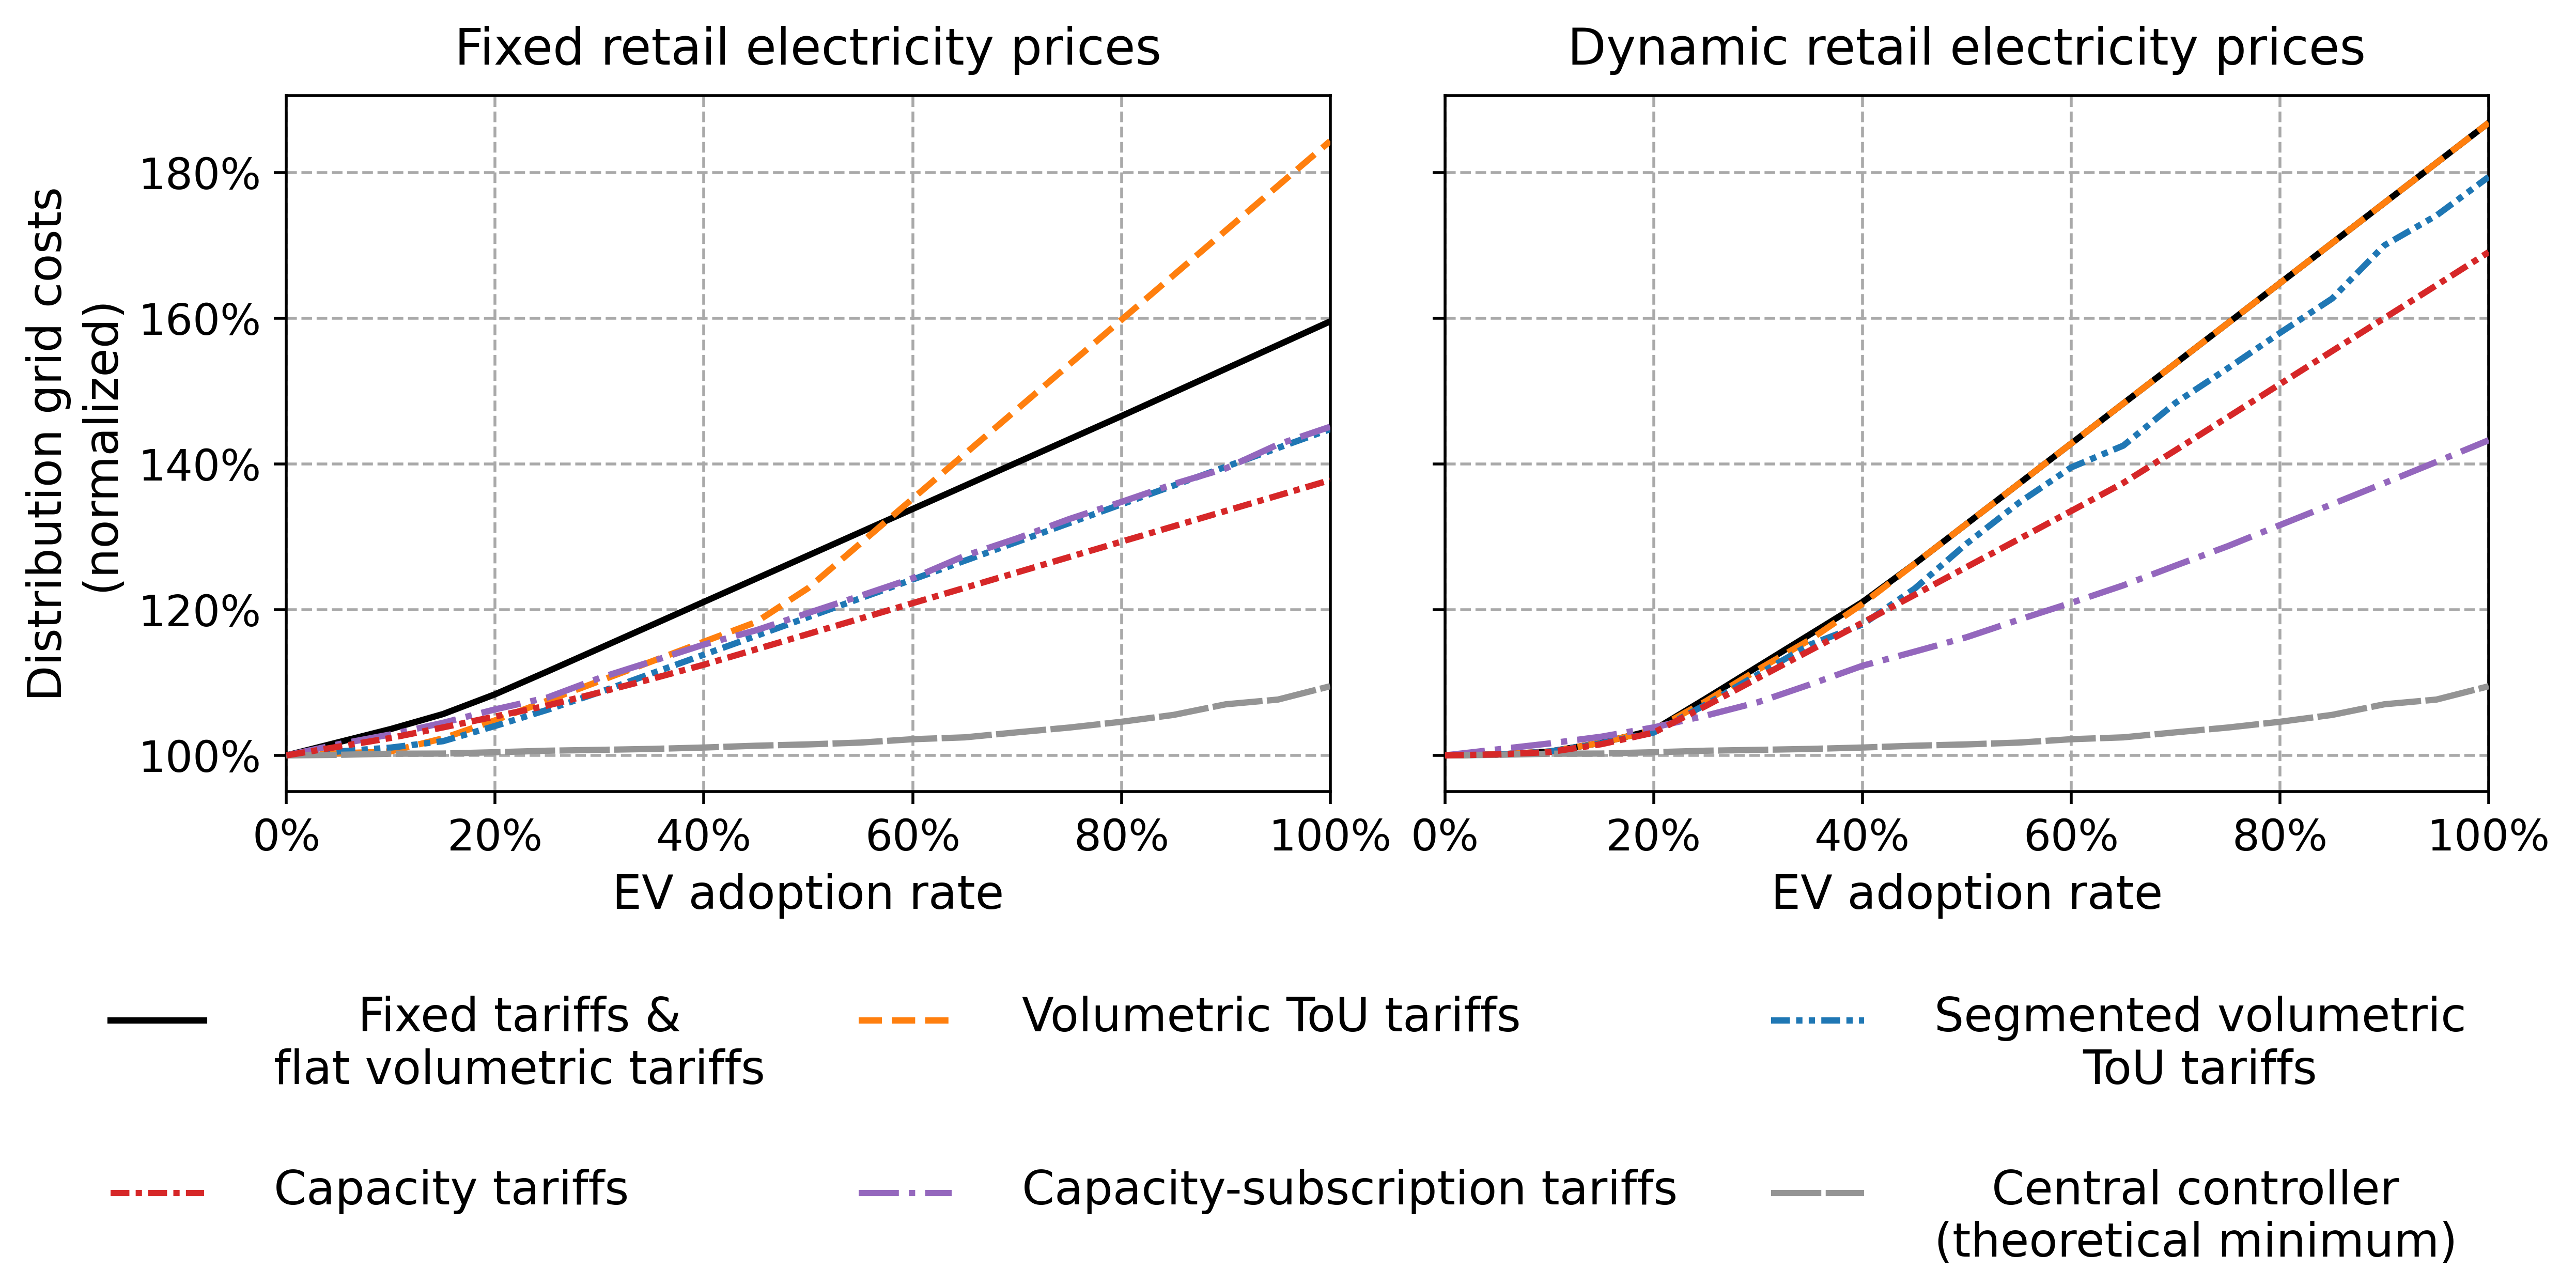

In [10]:
source_data=pd.read_excel('data/source data.xlsx',sheet_name='Figure 3',index_col=0)
tariff_structures=['Fixed','Volumetric_ToU','Segmented_volumetric_ToU','Capacity','Capacity_subscription']
expansion_costs=120 #€/kW
sunk_costs=hh_profiles['Total'].max()*2*expansion_costs
color_palette=sns.color_palette()

linecoldict = {
    'Fixed': 'black',                # Black for 'Fixed'
    'Volumetric_ToU': color_palette[1],             # Blue (previously green)
    'Segmented_volumetric_ToU': color_palette[0],      # Orange
    'Capacity': color_palette[3],           # Purple
    'Capacity_subscription': color_palette[4]      # Brown
}
labeldict={'Fixed':'Fixed tariffs &\nflat volumetric tariffs',
           'Volumetric_ToU':'Volumetric ToU tariffs\n',
           'Segmented_volumetric_ToU':'Segmented volumetric\nToU tariffs',
           'Capacity':'Capacity tariffs\n',
           'Capacity_subscription':'Capacity-subscription tariffs\n'
           }
linestyle_tuple = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),
     'long dash with offset': (5, (10, 3)),
     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}
linestyledict = {
    'Fixed':'-',     # Solid for 'Fixed'
    'Volumetric_ToU':'--',    # Dashed
    'Segmented_volumetric_ToU':linestyle_tuple['densely dashdotdotted'],    # Dash-dot
    'Capacity':linestyle_tuple['densely dashdotted'],   # Dotted with small gaps
    'Capacity_subscription':'-.',  # Dash-dot-dash
    }
"---------------------------------------------------------------------------------------------------------------"
fig=plt.figure(dpi=500,figsize=(11,3.5))
plt.subplots_adjust(wspace=0.11, hspace=0)
for j,retail_price_scheme in enumerate(['fixed','dynamic']):
    ax1=plt.subplot(1,2,j+1)
    counter=0
    for tariff in tariff_structures:
        if tariff=='Capacity':
            zorder=1000000
        else:
            zorder=1000
        plt.plot(source_data.index,source_data[tariff+'_'+retail_price_scheme]/sunk_costs*100,color=linecoldict[tariff],
                     label=labeldict[tariff],linestyle=linestyledict[tariff],zorder=zorder,lw=1.75)
        counter+=1
    plt.plot(source_data.index,source_data['central_controller']/sunk_costs*100,color=(0.581373, 0.581373, 0.581373),linestyle=(0, (8, 0.7)),label='Central controller\n(theoretical minimum)',zorder=1000,lw=1.75)
    if j==1:
        plt.setp(ax1.get_yticklabels(), visible=False)
        h, l = ax1.get_legend_handles_labels()
        h=[h[x] for x in [0,3,1,4,2,5]]
        l=[l[x] for x in [0,3,1,4,2,5]]

        kw = dict(
            ncol=3,
            loc="center",
            frameon=False,
            fontsize=13,
            handletextpad=1.5,   # space between line and label
            columnspacing=2,     # space between columns
            labelspacing=1.6     # space between rows (this is what you asked to increase)
        )        
        leg = plt.legend(h,l, bbox_to_anchor=[-0.15, -0.45],**kw)
        for t in leg.get_texts():
            t.set_ha('center') 
            x, y = t.get_position()
            t.set_position((x, y - 50))  # Adjust the -2 as needed (in points)
        upper_text='Dynamic retail electricity prices'         
    else:
        plt.ylabel('Distribution grid costs\n(normalized)',fontsize=13)
        upper_text='Fixed retail electricity prices'
    plt.xlabel('EV adoption rate',fontsize=13)    
    plt.grid(axis='both',color='darkgrey',linestyle='--')
    plt.ylim(95,source_data.max().max()*1.02/sunk_costs*100)
    plt.text(0.5,1.03,upper_text,transform=ax1.transAxes,ha='center',va='bottom',fontsize=14)
    ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0,100)     




           



